In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | guymon
Processing Record 4 of Set 1 | show low
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | xining
Processing Record 9 of Set 1 | genhe
Processing Record 10 of Set 1 | progreso
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | chitral
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | dong hoi
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | staryy nadym
Processing Record 17 of Set 1 | las vegas
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | iwanai
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | mys shmidta
City not found. Skippin

Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | caohai
Processing Record 43 of Set 4 | lagos
Processing Record 44 of Set 4 | champasak
Processing Record 45 of Set 4 | azul
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | maragogi
Processing Record 3 of Set 5 | haibowan
City not found. Skipping...
Processing Record 4 of Set 5 | pacific grove
Processing Record 5 of Set 5 | bilma
Processing Record 6 of Set 5 | kiunga
Processing Record 7 of Set 5 | jesup
Processing Record 8 of Set 5 | bridgewater
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 11 of Set 5 | komsomolskiy
Processing Record 12 of Set 5 | kavaratti
Processing Record 13 of Set 5 | tessalit
Proce

Processing Record 34 of Set 8 | pihuamo
Processing Record 35 of Set 8 | trojes
Processing Record 36 of Set 8 | pathein
Processing Record 37 of Set 8 | sao jose da coroa grande
Processing Record 38 of Set 8 | soe
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | chichihualco
Processing Record 41 of Set 8 | eyl
Processing Record 42 of Set 8 | mahebourg
Processing Record 43 of Set 8 | mutsu
Processing Record 44 of Set 8 | bobon
Processing Record 45 of Set 8 | yomou
Processing Record 46 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | chegdomyn
Processing Record 49 of Set 8 | praya
Processing Record 50 of Set 8 | kasongo-lunda
Processing Record 1 of Set 9 | port hardy
Processing Record 2 of Set 9 | saint george
Processing Record 3 of Set 9 | avera
Processing Record 4 of Set 9 | guerrero negro
Processing Record 5 of Set 9 | kushmurun
Processing Record 6 of Set 9 | san joaquin
Processin

Processing Record 19 of Set 12 | kununurra
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | merauke
Processing Record 22 of Set 12 | horizontina
Processing Record 23 of Set 12 | bardstown
Processing Record 24 of Set 12 | hofn
Processing Record 25 of Set 12 | abu samrah
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 28 of Set 12 | jumla
Processing Record 29 of Set 12 | tacoronte
Processing Record 30 of Set 12 | oussouye
Processing Record 31 of Set 12 | chilca
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | anito
Processing Record 34 of Set 12 | umm lajj
Processing Record 35 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 12 | codrington
Processing Record 37 of Set 12 | roebourne
Processing Record 38 of Set 12 | port-gentil
Processing Record 39 of Set 12 | bosaso
Processing Record 40 of Set 12 | sarlat-la-caneda
Proc

In [10]:
len(city_data)

569

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,6.92,80,82,3.60,AU,2021-12-04 17:17:53
1,Guymon,36.6828,-101.4816,8.04,57,1,2.06,US,2021-12-04 17:19:08
2,Show Low,34.2542,-110.0298,13.34,40,1,0.00,US,2021-12-04 17:14:16
3,Ushuaia,-54.8000,-68.3000,16.81,27,75,6.17,AR,2021-12-04 17:19:08
4,Vila Franca Do Campo,37.7167,-25.4333,20.11,71,75,0.81,PT,2021-12-04 17:19:08
5,La Ronge,55.1001,-105.2842,-17.86,71,40,2.57,CA,2021-12-04 17:19:09
6,Xining,36.6167,101.7667,-2.72,30,0,1.27,CN,2021-12-04 17:19:09
7,Genhe,50.7833,121.5167,-18.34,100,100,1.03,CN,2021-12-04 17:19:09
8,Progreso,21.2833,-89.6667,27.84,58,43,4.07,MX,2021-12-04 17:19:09
9,Ribeira Grande,38.5167,-28.7000,17.22,94,75,2.06,PT,2021-12-04 17:19:10


In [12]:
# Reorder the columns.
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2021-12-04 17:17:53,-42.8794,147.3294,6.92,80,82,3.60
1,Guymon,US,2021-12-04 17:19:08,36.6828,-101.4816,8.04,57,1,2.06
2,Show Low,US,2021-12-04 17:14:16,34.2542,-110.0298,13.34,40,1,0.00
3,Ushuaia,AR,2021-12-04 17:19:08,-54.8000,-68.3000,16.81,27,75,6.17
4,Vila Franca Do Campo,PT,2021-12-04 17:19:08,37.7167,-25.4333,20.11,71,75,0.81
5,La Ronge,CA,2021-12-04 17:19:09,55.1001,-105.2842,-17.86,71,40,2.57
6,Xining,CN,2021-12-04 17:19:09,36.6167,101.7667,-2.72,30,0,1.27
7,Genhe,CN,2021-12-04 17:19:09,50.7833,121.5167,-18.34,100,100,1.03
8,Progreso,MX,2021-12-04 17:19:09,21.2833,-89.6667,27.84,58,43,4.07
9,Ribeira Grande,PT,2021-12-04 17:19:10,38.5167,-28.7000,17.22,94,75,2.06


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

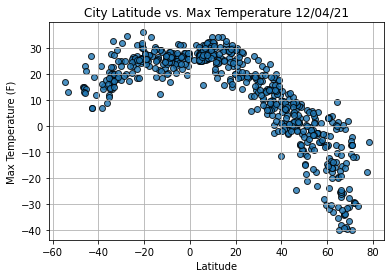

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

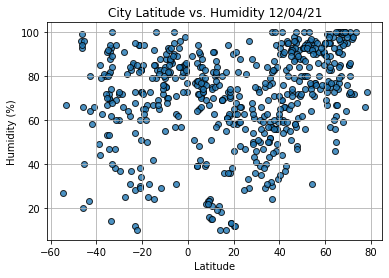

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

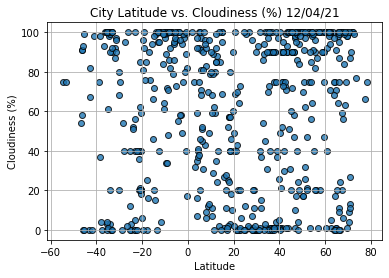

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

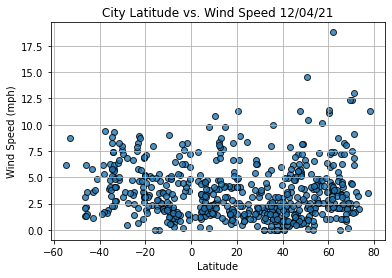

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()